# Exploratory Data Analysis

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None);
pd.set_option('display.max_rows', None);

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [8]:
df = pd.read_csv('churn.csv')
df.columns = map(str.lower, df.columns)
df.index = df.index + 1
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(10000, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
numofproducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
hascrcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactivemember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimatedsalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [12]:
df.groupby("gender").agg({"age": "mean"})

,age
gender,
Female,39.238389
Male,38.658237


In [13]:
df.groupby("geography").agg({"exited": "mean"})

,exited
geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [14]:
df["exited"].value_counts()

,count
exited,
0,7963
1,2037


In [15]:
churn = df[df["exited"] == 1]

In [16]:
churn.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [17]:
churn.shape

(2037, 13)

In [18]:
churn.groupby("gender").agg({"exited": "count"})

,exited
gender,
Female,1139
Male,898


In [19]:
churn.groupby("geography").agg({"exited": "count"})

,exited
geography,
France,810
Germany,814
Spain,413


In [20]:
non_churn = df[df["exited"] == 0]

In [21]:
non_churn.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [22]:
non_churn.shape

(7963, 13)

In [23]:
non_churn.groupby("geography").agg({"exited": "count"})

,exited
geography,
France,4204
Germany,1695
Spain,2064


In [24]:
df.nunique()

,0
customerid,10000
surname,2932
creditscore,460
geography,3
gender,2
age,70
tenure,11
balance,6382
numofproducts,4
hascrcard,2


In [26]:
df[df['surname'] == 'Smith']

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
235,15704769,Smith,585,France,Female,67,5,113978.97,2,0,1,93146.11,0
480,15797736,Smith,658,France,Male,29,4,80262.60,1,1,1,20612.82,0
746,15640059,Smith,606,France,Male,40,5,0.00,2,1,1,70899.27,0
1065,15699598,Smith,723,France,Female,20,4,0.00,2,1,1,140385.33,0
1757,15670702,Smith,618,France,Male,37,2,168178.21,2,0,1,101273.23,0
2134,15726354,Smith,688,France,Female,32,6,123157.95,1,1,0,172531.23,0
2318,15627212,Smith,630,France,Female,36,2,110414.48,1,1,1,48984.95,0
2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1
3836,15670859,Smith,718,Germany,Female,39,7,93148.74,2,1,1,190746.38,0
4477,15723028,Smith,778,France,Male,33,1,0.00,2,1,0,85439.73,0


In [27]:
df.groupby(["gender", "exited"]).agg({"tenure": "mean"})

tenure
gender exited          
Female 0       4.977086
       1       4.933275
Male   0       5.075236
       1       4.932071

In [28]:
df.groupby("exited").agg({"tenure": ["min","mean","max"],
                           "creditscore": ["min","mean","max"],
                           "age": ["min","mean","max"],
                           "balance": ["min","mean","max"],
                           "estimatedsalary": ["min","mean","max"]})

tenure               creditscore                  age                 \
          min      mean max         min        mean  max min       mean max   
exited                                                                        
0           0  5.033279  10         405  651.853196  850  18  37.408389  92   
1           0  4.932744  10         350  645.351497  850  18  44.837997  84   

       balance                          estimatedsalary                 \
           min          mean        max             min           mean   
exited                                                                   
0          0.0  72745.296779  221532.80           90.07   99738.391772   
1          0.0  91108.539337  250898.09           11.58  101465.677531   

                   
              max  
exited             
0       199992.48  
1       199808.10

In [29]:
df.groupby(["isactivemember", "hascrcard"]).agg({"exited" : "count"})

exited
isactivemember hascrcard        
0              0            1401
               1            3448
1              0            1544
               1            3607

In [30]:
df.groupby(["isactivemember", "hascrcard"]).agg({"balance" : "mean"})

balance
isactivemember hascrcard              
0              0          77825.424525
               1          76853.588646
1              0          78007.318381
               1          74962.849983

In [31]:
df.groupby("gender").agg({"balance" : "mean"})

,balance
gender,
Female,75659.369139
Male,77173.974506


In [32]:
# The age variable was divided into 5 parts and the age range in which there is the most abandonment was examined.
df["NewAge"] = pd.qcut(df['age'], 5)
df.groupby("NewAge")["exited"].value_counts()

NewAge          exited
(17.999, 31.0]  0         2191
                1          181
(31.0, 35.0]    0         1615
                1          166
(35.0, 40.0]    0         1927
                1          339
(40.0, 46.0]    0         1211
                1          485
(46.0, 92.0]    0         1019
                1          866
Name: count, dtype: int64

In [33]:
df.groupby(["gender","NewAge" ])["exited"].value_counts()

gender  NewAge          exited
Female  (17.999, 31.0]  0          959
                        1          107
        (31.0, 35.0]    0          670
                        1           96
        (35.0, 40.0]    0          818
                        1          189
        (40.0, 46.0]    0          525
                        1          263
        (46.0, 92.0]    1          484
                        0          432
Male    (17.999, 31.0]  0         1232
                        1           74
        (31.0, 35.0]    0          945
                        1           70
        (35.0, 40.0]    0         1109
                        1          150
        (40.0, 46.0]    0          686
                        1          222
        (46.0, 92.0]    0          587
                        1          382
Name: count, dtype: int64

In [34]:
# How many people whose balance is 0 and do not leave?
df[(df["balance"] == 0) & (df["exited"] == 0)].shape

(3117, 14)

In [35]:
# balace zero and they leave
df[(df["balance"] == 0) & (df["exited"] == 1)].shape

(500, 14)

In [36]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                 customerid  creditscore       age    tenure   balance  \
customerid         1.000000     0.005308  0.009497 -0.014883 -0.012419   
creditscore        0.005308     1.000000 -0.003965  0.000842  0.006268   
age                0.009497    -0.003965  1.000000 -0.009997  0.028308   
tenure            -0.014883     0.000842 -0.009997  1.000000 -0.012254   
balance           -0.012419     0.006268  0.028308 -0.012254  1.000000   
numofproducts      0.016972     0.012238 -0.030680  0.013444 -0.304180   
hascrcard         -0.014025    -0.005458 -0.011721  0.022583 -0.014858   
isactivemember     0.001665     0.025651  0.085472 -0.028362 -0.010084   
estimatedsalary    0.015271    -0.001384 -0.007201  0.007784  0.012797   
exited            -0.006248    -0.027094  0.285323 -0.014001  0.118533   

                 numofproducts  hascrcard  isactivemember  estimatedsalary  \
customerid            0.016972  -0.014025        0.001665         0.015271   
creditscore           0.01223

# Data Visualization

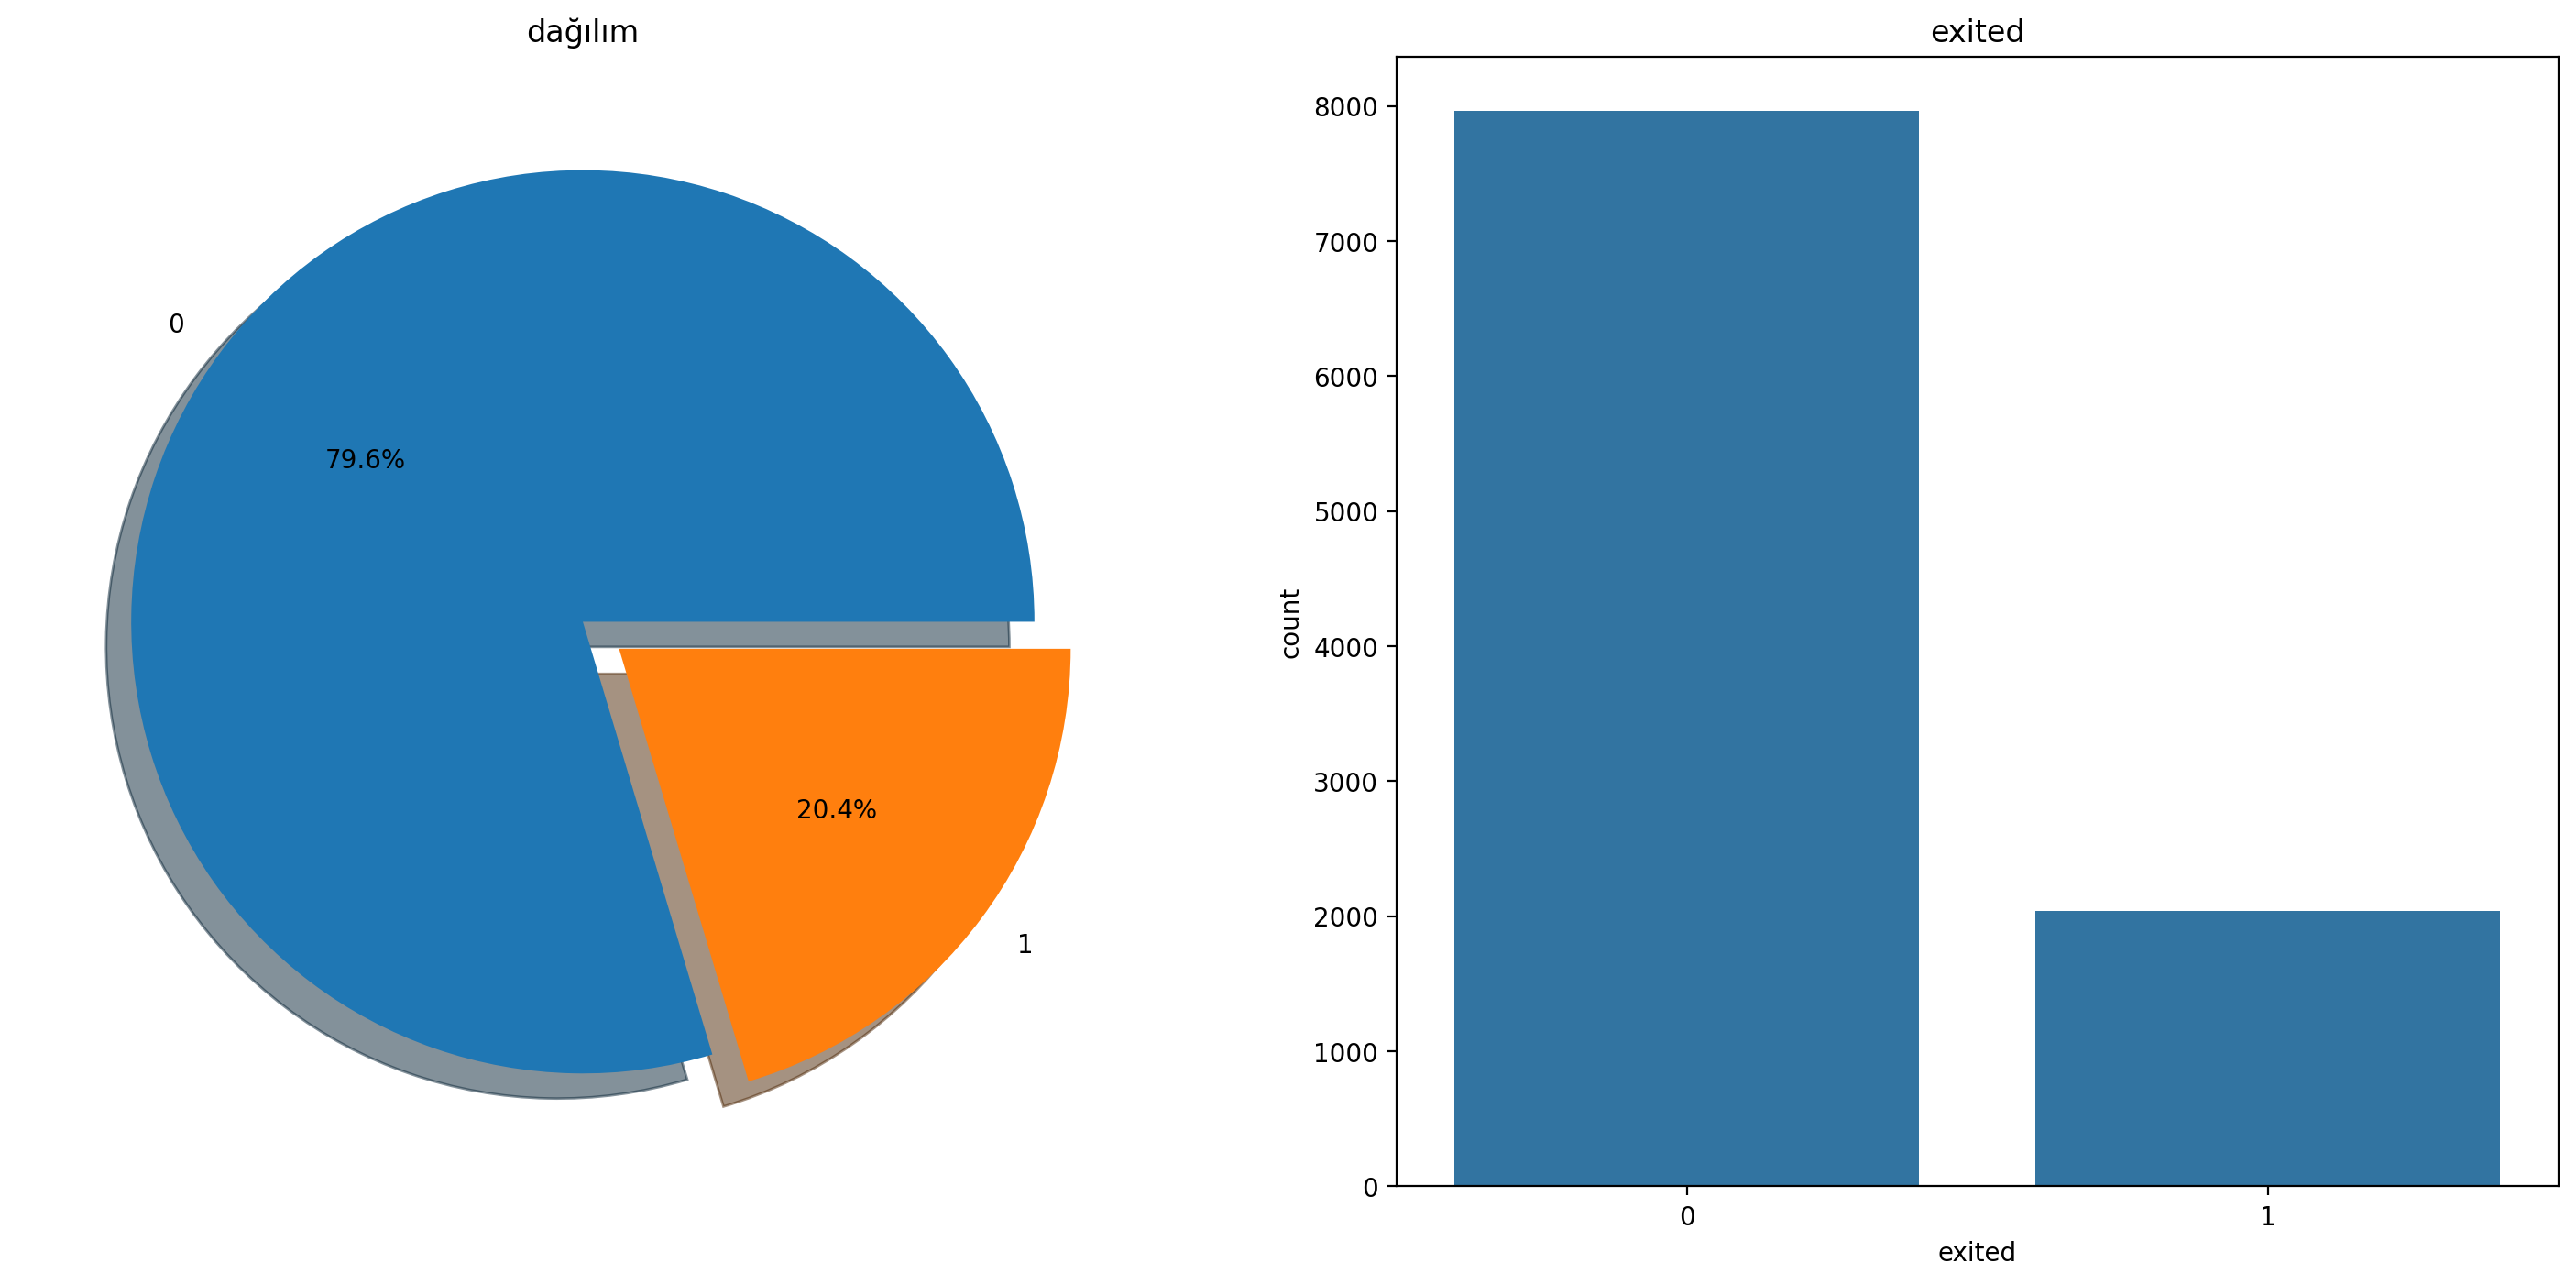

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')
sns.countplot(x='exited',data=df,ax=ax[1])
ax[1].set_title('exited')
plt.show()

<Axes: xlabel='isactivemember', ylabel='count'>

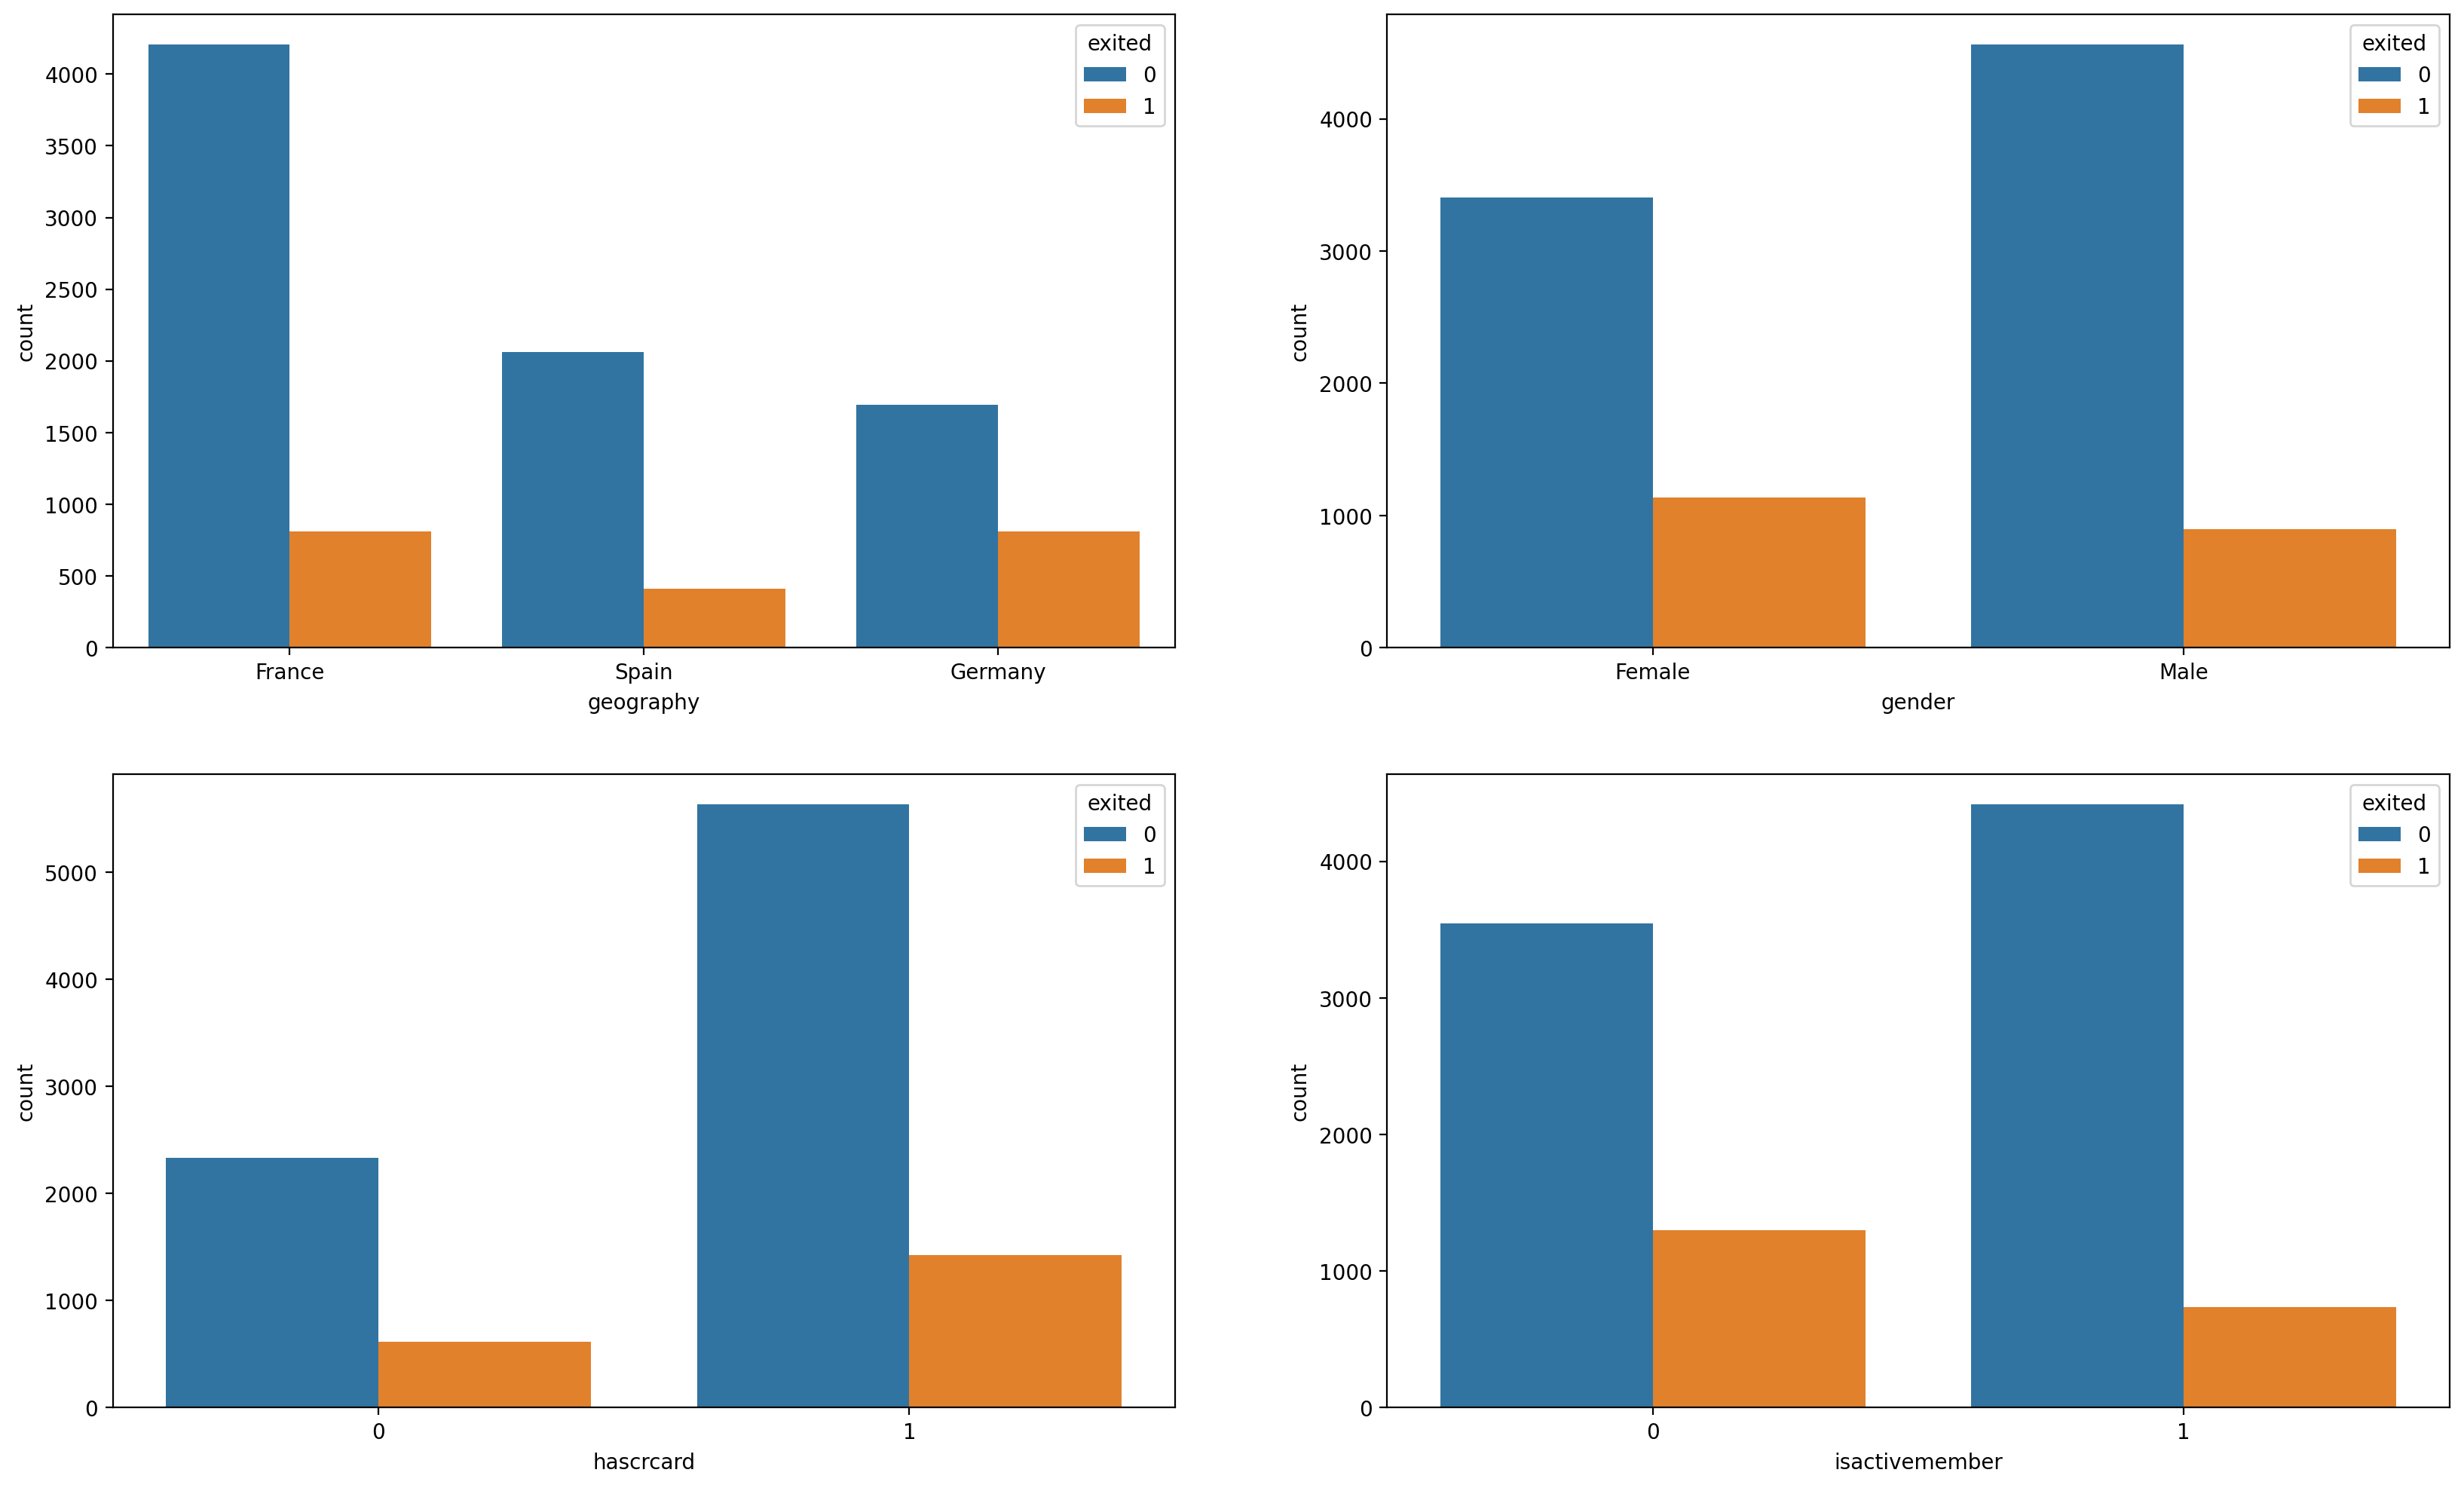

In [38]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography', hue = 'exited',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'exited',data = df, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'exited',data = df, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'exited',data = df, ax=axarr[1][1])

In [39]:
import plotly.express as px
fig = px.bar(df,y = "exited", x = "age" , color = "geography")
fig.show()

In [40]:
import plotly.express as px
df_counts = df.groupby(["gender", "exited"])["exited"].count().reset_index(name='count')

fig = px.pie(df_counts, values='count', names=["Female,0","Female 1","Male,0","Male,1"])
fig.show()

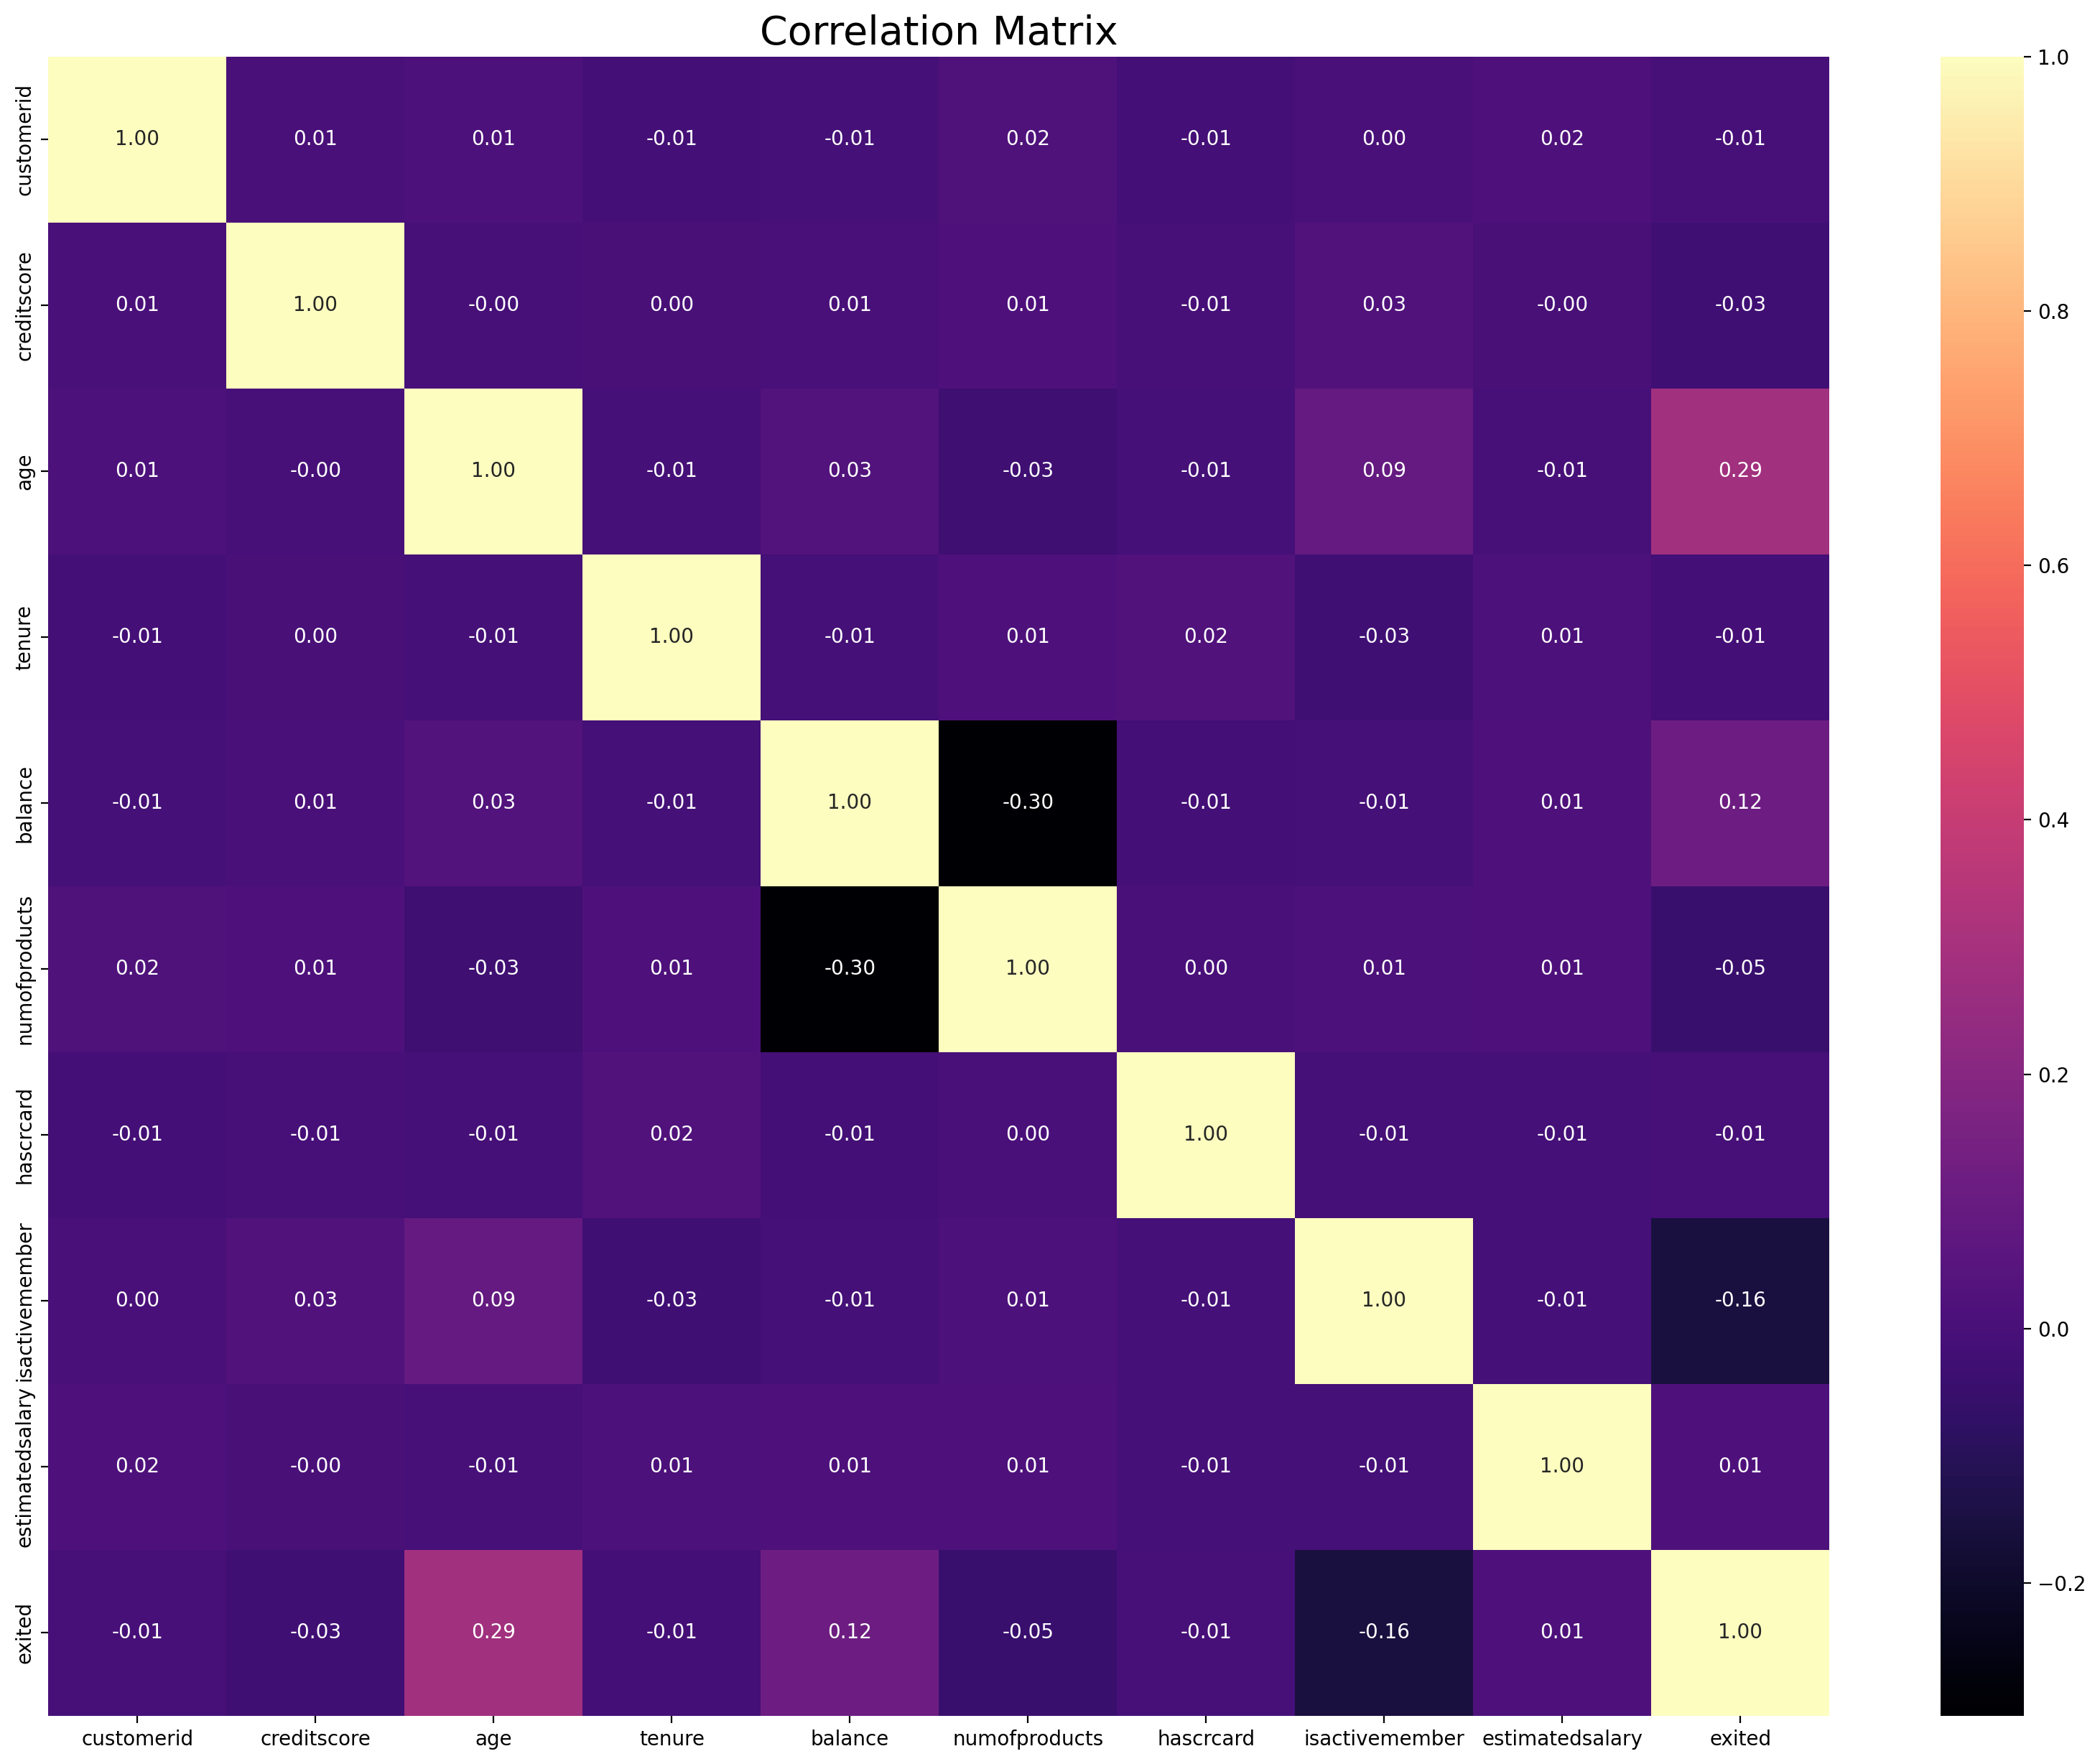

In [41]:
#correlation matrix
f, ax = plt.subplots(figsize = [20,15])
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

<Axes: xlabel='exited', ylabel='estimatedsalary'>

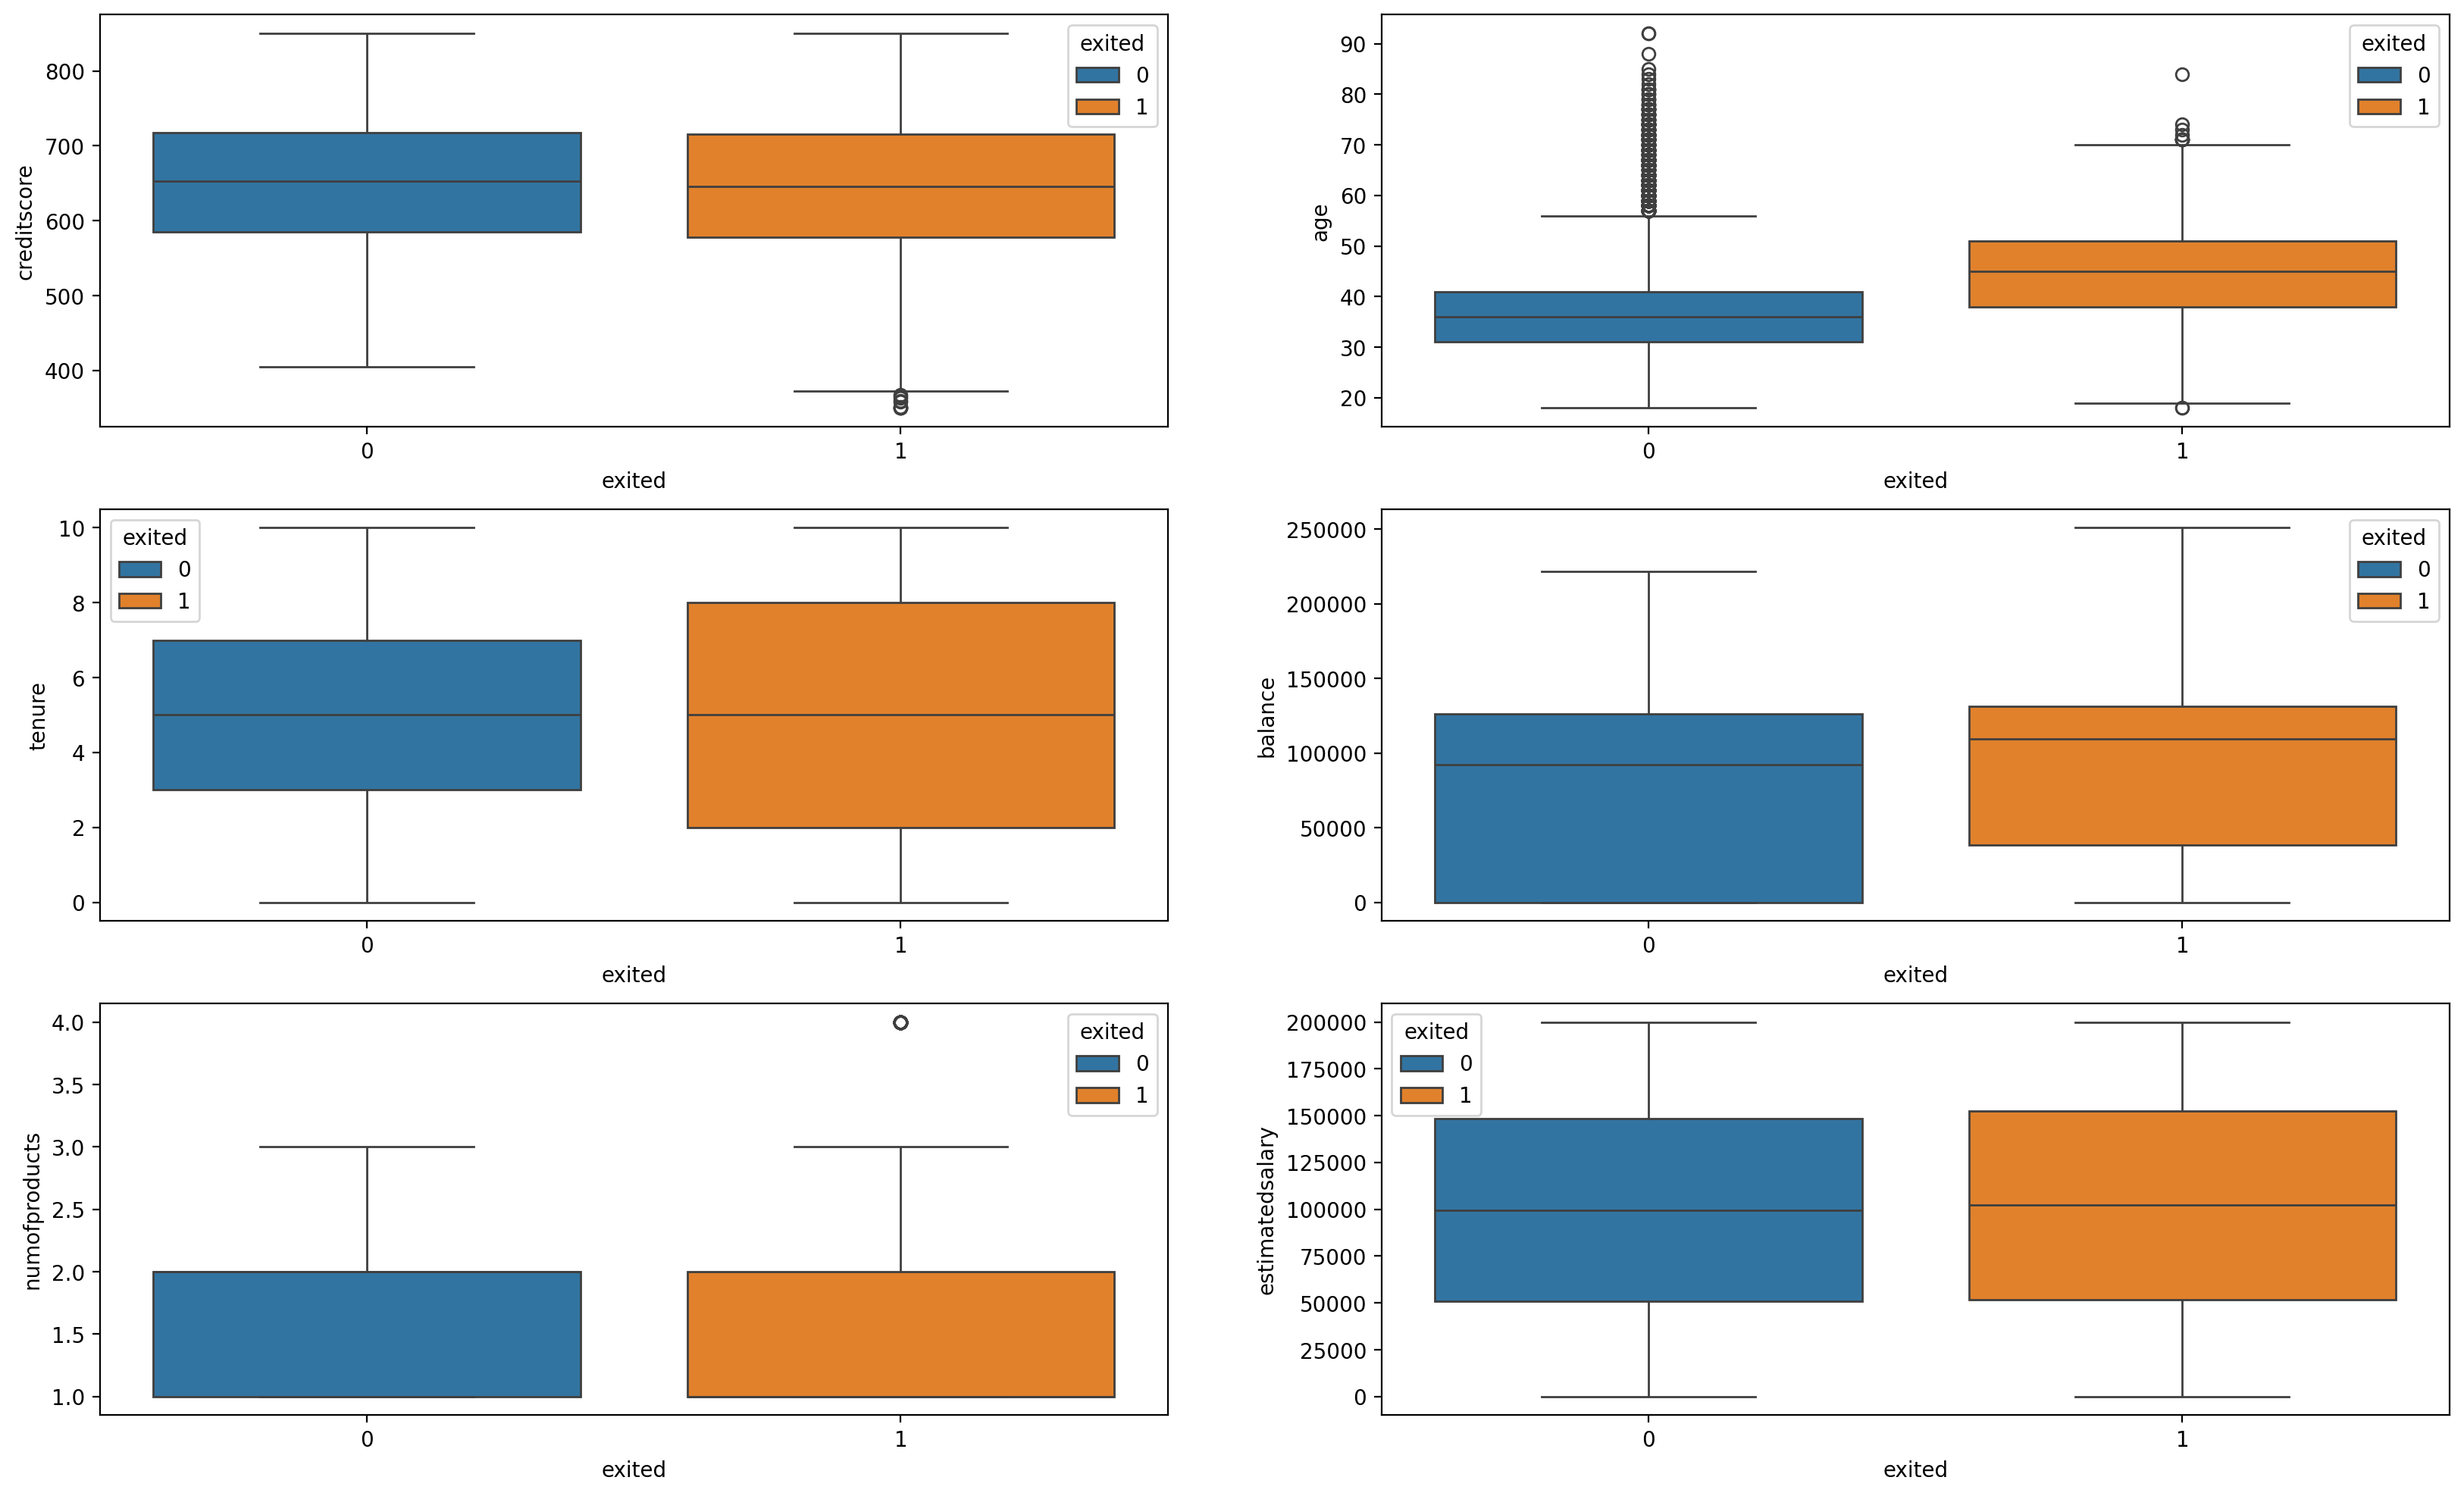

In [42]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'exited', hue = 'exited',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = df, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = df, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = df, ax=axarr[2][1])

# Data Preprocessing

In [43]:
#Missing and Outlier Observation Analysis
df.isnull().sum()

,0
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0
hascrcard,0


In [44]:
#Outliers
for feature in df[['creditscore','tenure', 'balance','estimatedsalary']]:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Convert the boolean Series to a NumPy array before using any()
    if (df[feature] > upper).to_numpy().any():
        print(feature,"yes")
    else:
        print(feature, "no")

creditscore no
tenure no
balance no
estimatedsalary no


In [45]:
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAge
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]"
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]"
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]"
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]"
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]"


In [46]:
#One Hot Encoding
df = pd.get_dummies(df, columns=['geography', 'gender'], drop_first=True)

In [47]:
df.head()

,customerid,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAge,geography_Germany,geography_Spain,gender_Male
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]",False,False,False
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]",False,True,False
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]",False,False,False
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]",False,False,False
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]",False,True,False


In [48]:
df = df.drop(["customerid","surname","NewAge"], axis = 1)
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
1,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
2,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
3,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
4,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
5,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [49]:
#Scaling

cat_df = df[["geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"]]

cat_df.head()



,geography_Germany,geography_Spain,gender_Male,hascrcard,isactivemember
1,False,False,False,1,1
2,False,True,False,0,1
3,False,False,False,1,0
4,False,False,False,0,0
5,False,True,False,1,1


In [50]:
y = df["exited"]
X = df.drop(["exited","geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"], axis = 1)
cols = X.columns
index = X.index

In [51]:
X.head()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary
1,619,42,2,0.00,1,101348.88
2,608,41,1,83807.86,1,112542.58
3,502,42,8,159660.80,3,113931.57
4,699,39,1,0.00,2,93826.63
5,850,43,2,125510.82,1,79084.10


In [52]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)
X = pd.concat([X,cat_df], axis = 1)
X.head()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,geography_Germany,geography_Spain,gender_Male,hascrcard,isactivemember
1,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,False,False,False,1,1
2,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,False,True,False,0,1
3,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,False,False,False,1,0
4,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,False,False,False,0,0
5,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,False,True,False,1,1


In [53]:
y.head()

,exited
1,1
2,0
3,1
4,0
5,0


In [54]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [63]:
#Train-Test Separation & Balancing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

In [64]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_train, y_train = smk.fit_resample(X_train, y_train)
X_test, y_test = smk.fit_resample(X_test, y_test)

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12628, 11)
(12628,)
(3126, 11)
(3126,)


# Modelling

In [70]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

results = []
names = []

In [71]:
#Accuracy Score
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.723928)
KNN: (0.736404)
CART: (0.778311)
RF: (0.816379)
SVM: (0.807742)
XGB: (0.867882)
CatBoost: (0.896673)


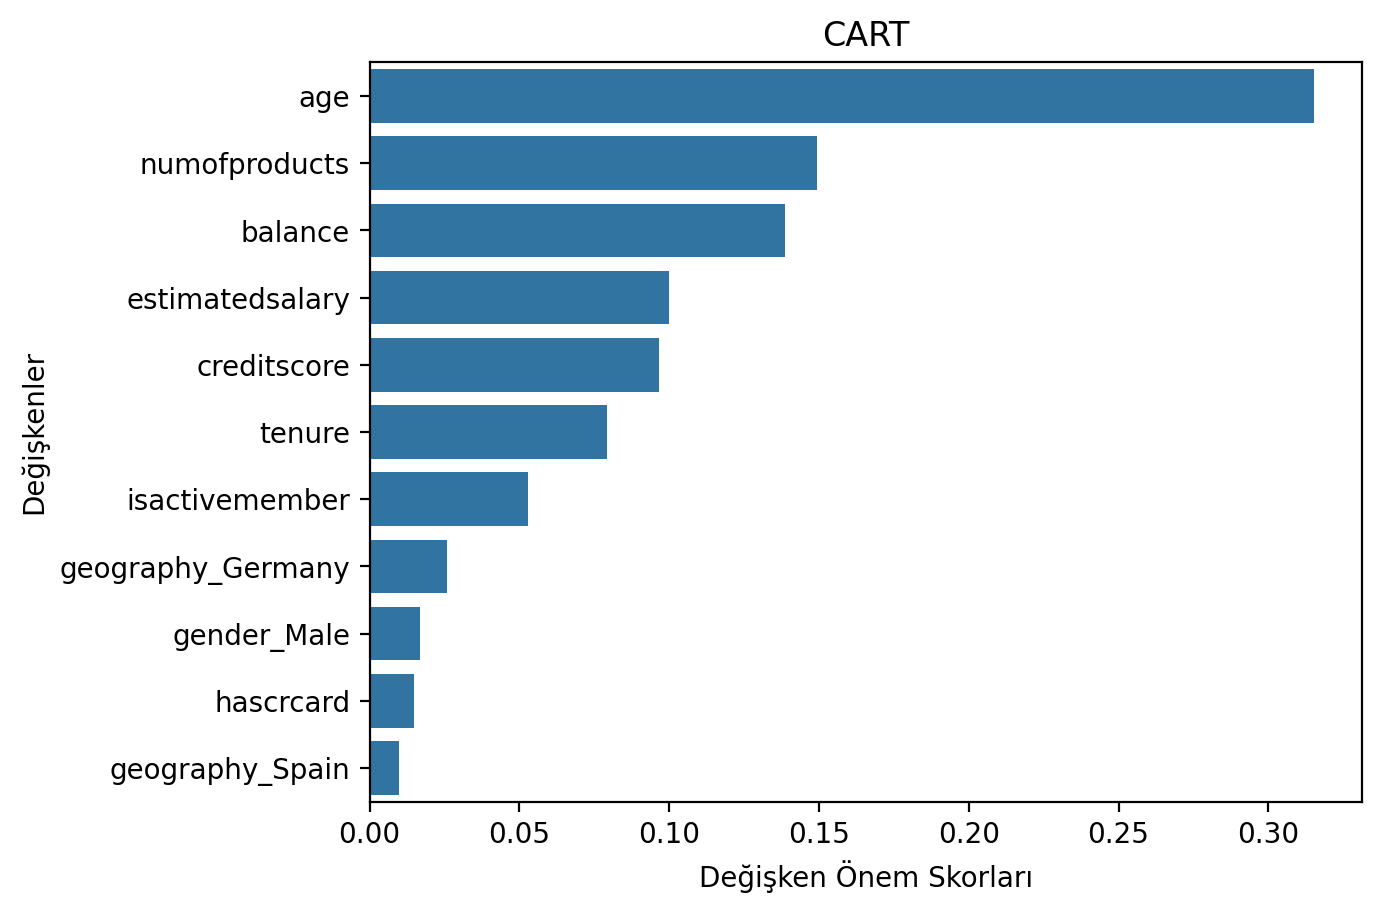

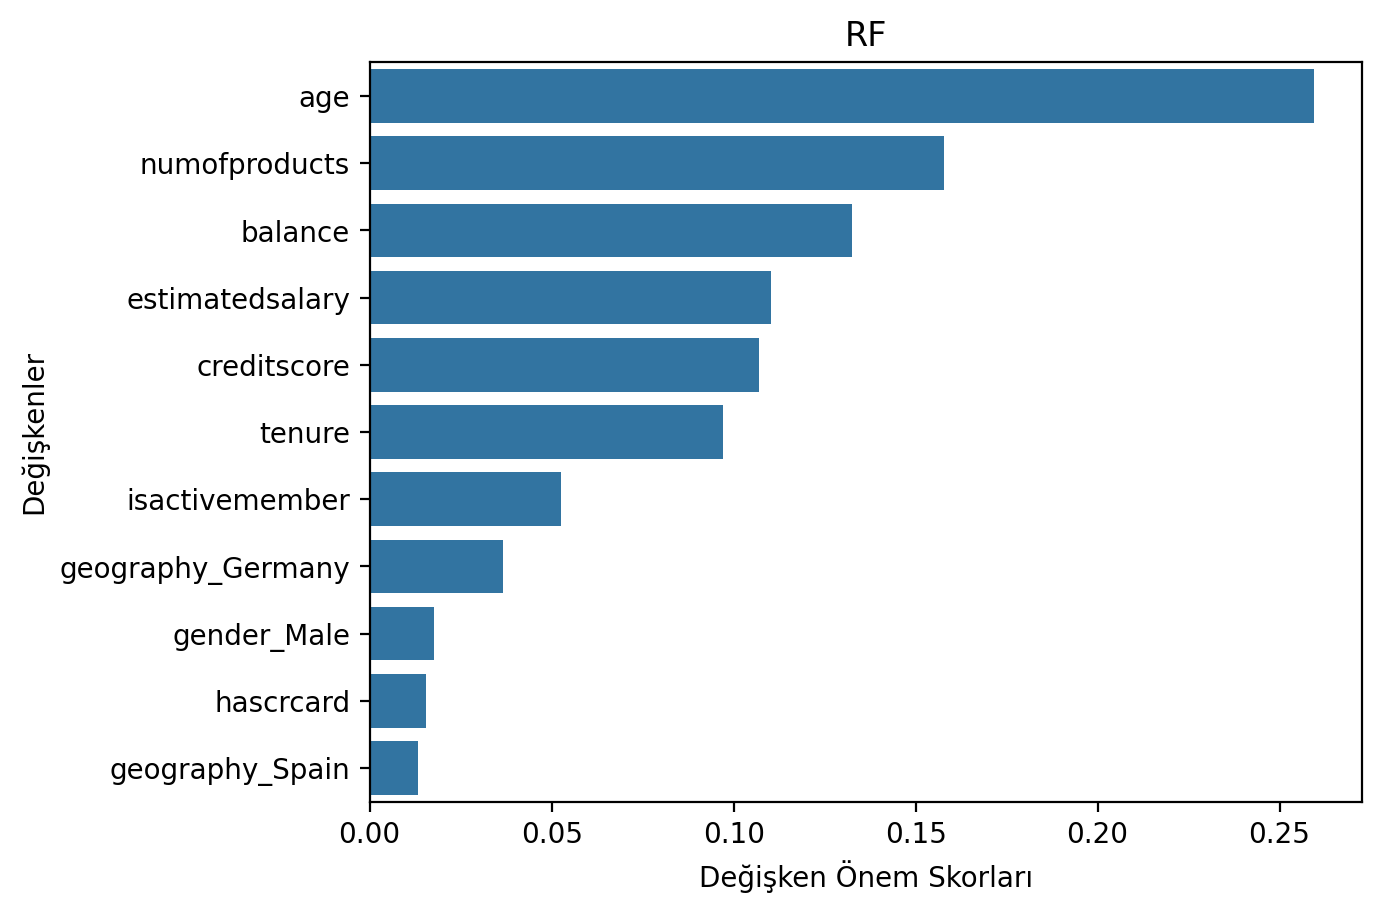

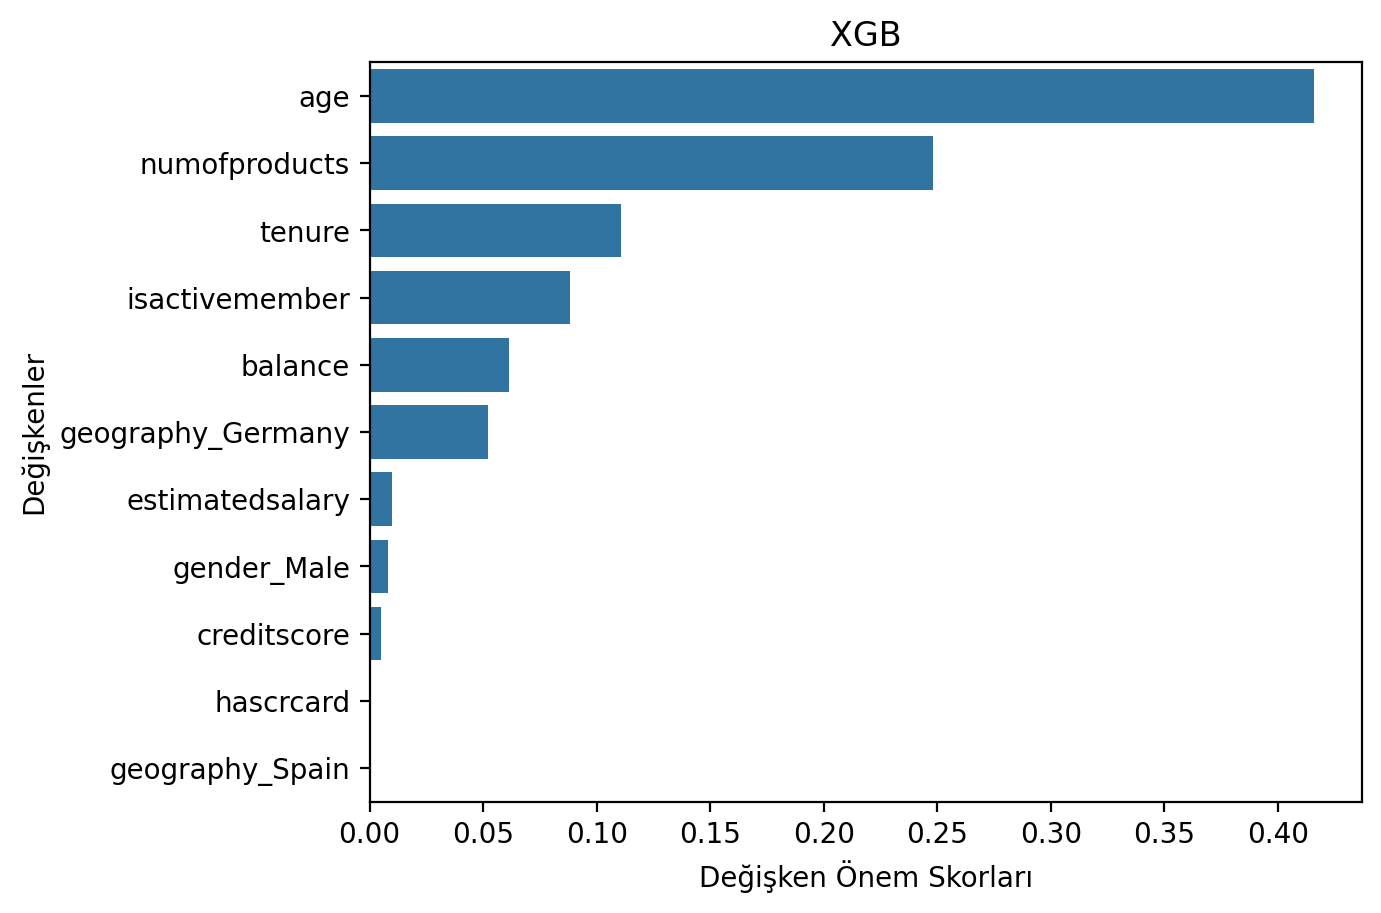

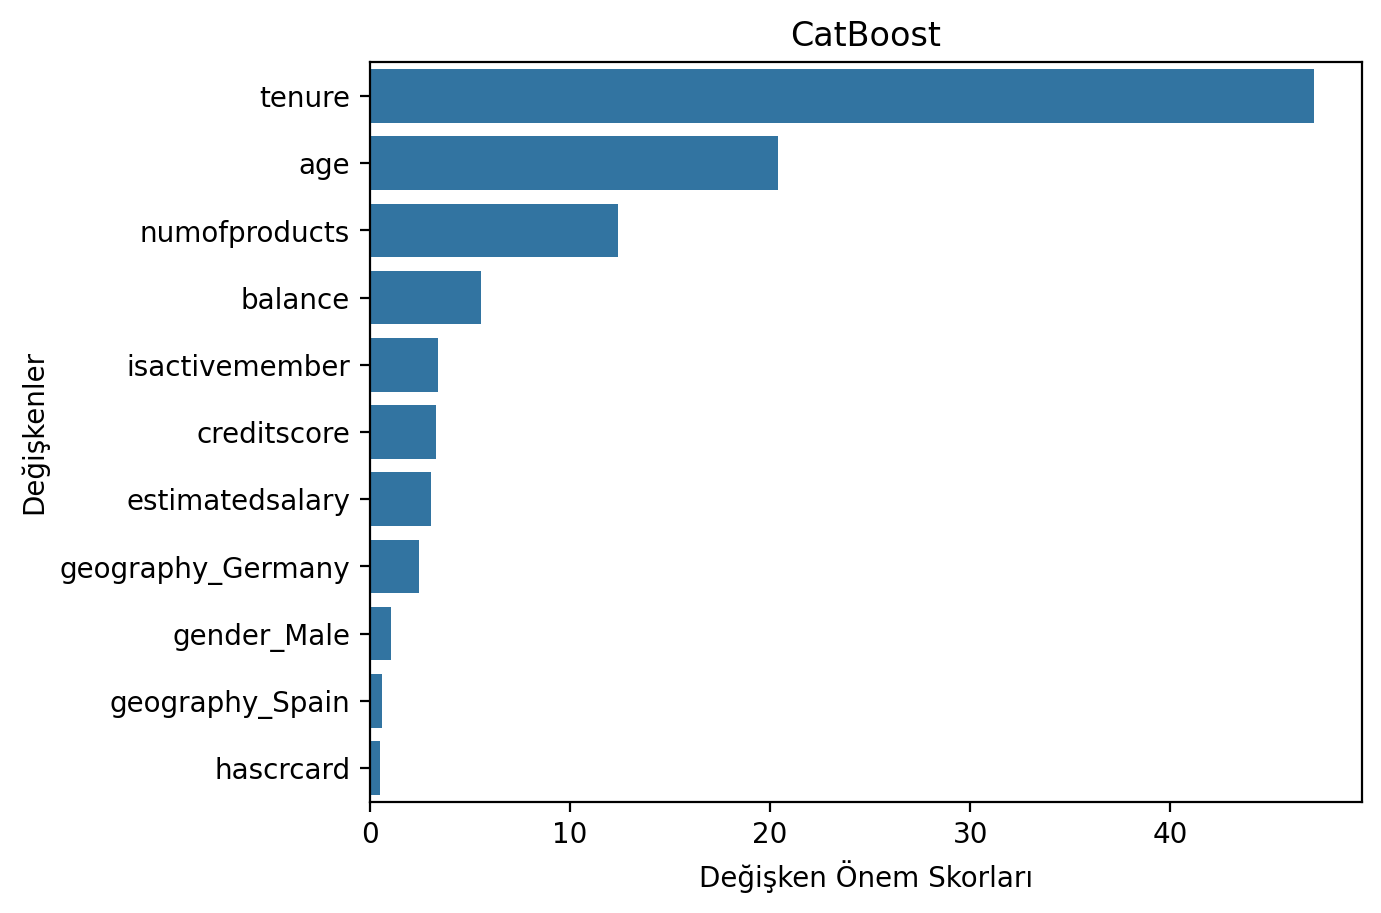

In [72]:
#Variable Importance Levels of All Models
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

In [73]:
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

XGB: (0.893794)
CatBoost: (0.880358)


# Confusion Matrix

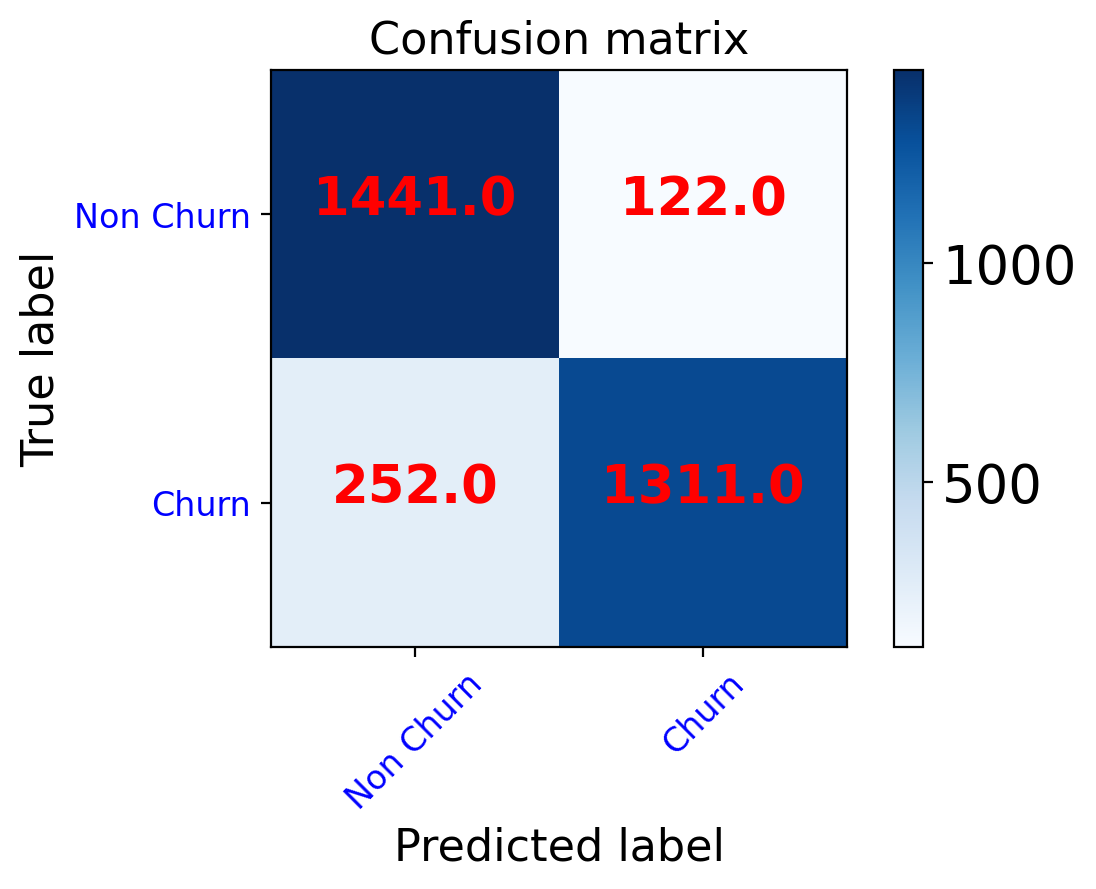

In [74]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                      title='Confusion matrix')

In [75]:
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1441
False Positives:  122
False Negatives:  252
True Positives:  1311


In [76]:
df_pred = pd.DataFrame(data=[],columns=["y_test"])
df_pred["y_pred"] = y_pred
df_pred["y_test"] = y_test
df_pred.index = df_pred.index + 1
df_pred.head()

,y_test,y_pred
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0


In [77]:
FP_predicts_indexes = []
TP_predicts_indexes=[]
FN_predict_indexes =[]
TN_predicts_indexes  = []
for index, row in df_pred.iterrows():
    if row['y_test'] == 0 and row['y_pred'] == 1:
        FP_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 1:
        TP_predicts_indexes.append(row.name)
    elif row['y_test'] == 0 and row['y_pred'] == 0:
        TN_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 0:
        FN_predict_indexes.append(row.name)

df_pred.loc[TN_predicts_indexes,"prediction_result"] = "TN"
df_pred.loc[TP_predicts_indexes,"prediction_result"] = "TP"
df_pred.loc[FP_predicts_indexes,"prediction_result"] = "FP"
df_pred.loc[FN_predict_indexes,"prediction_result"] = "FN"
df_pred.head()



,y_test,y_pred,prediction_result
1,0,1,FP
2,0,0,TN
3,0,0,TN
4,0,0,TN
5,0,0,TN


In [78]:
df_pred[df_pred["prediction_result"] == "FP"].head()

,y_test,y_pred,prediction_result
1,0,1,FP
13,0,1,FP
16,0,1,FP
27,0,1,FP
29,0,1,FP


In [79]:
df_pred[df_pred["prediction_result"] == "FN"].head()

,y_test,y_pred,prediction_result
8,1,0,FN
20,1,0,FN
26,1,0,FN
34,1,0,FN
39,1,0,FN


# ROC Curve

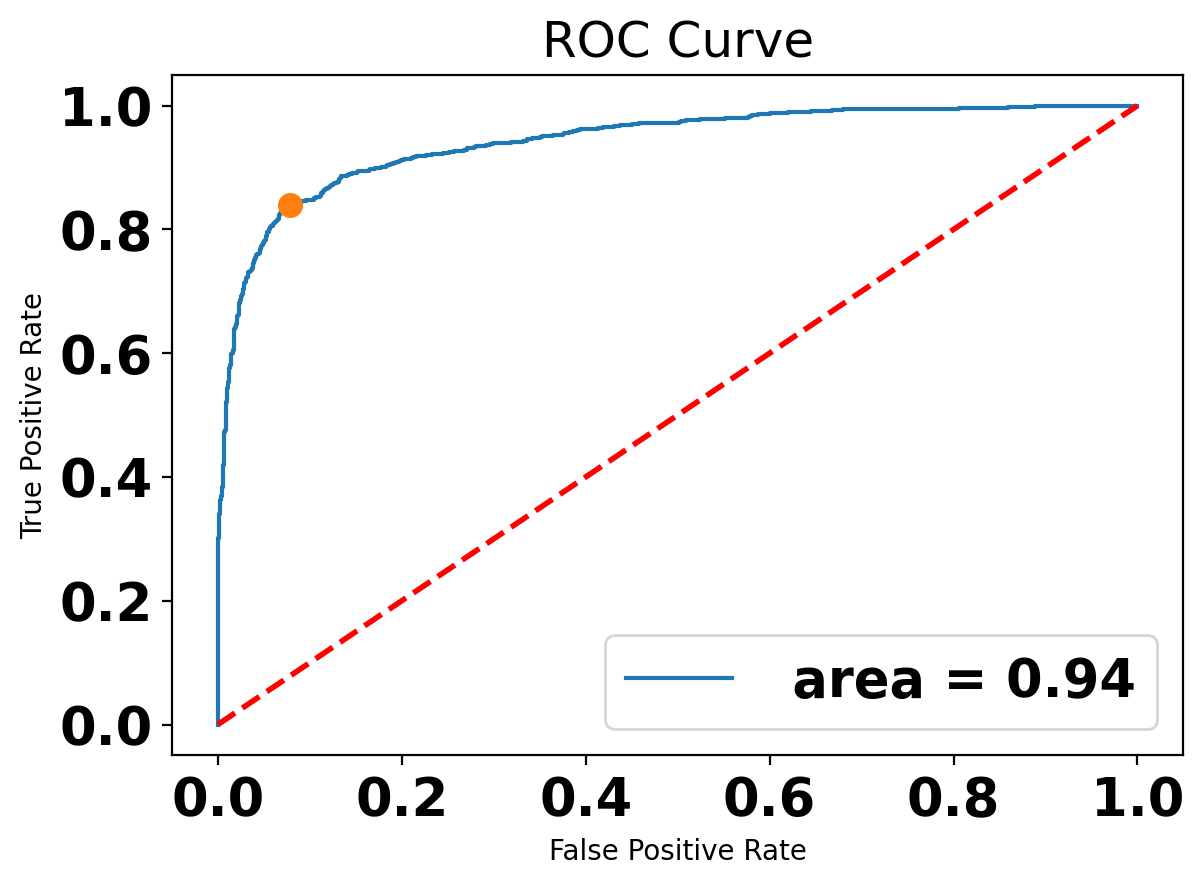

In [80]:
lbgm_tuned = model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()